In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualizationdf_e.shape
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Load the dataset
df_e = pd.read_csv('../data/processed/additional_data.csv')


In [3]:
import warnings
warnings.filterwarnings("ignore")


#### Remove outliers

#### 1. Price

<Axes: xlabel='price', ylabel='Count'>

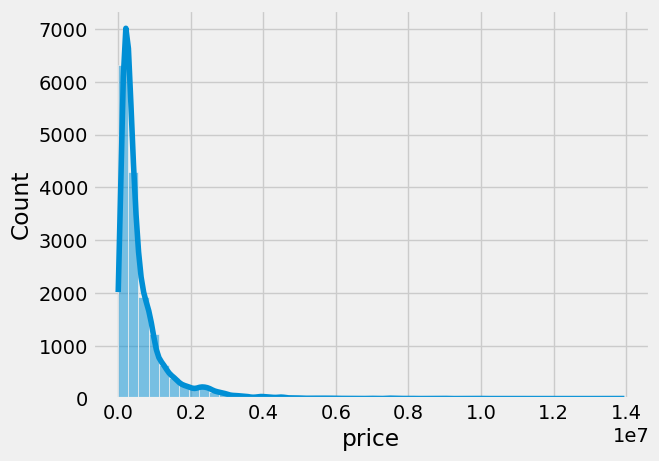

In [4]:
sns.histplot(df_e['price'],kde = True,bins=50)

<Axes: xlabel='price', ylabel='Count'>

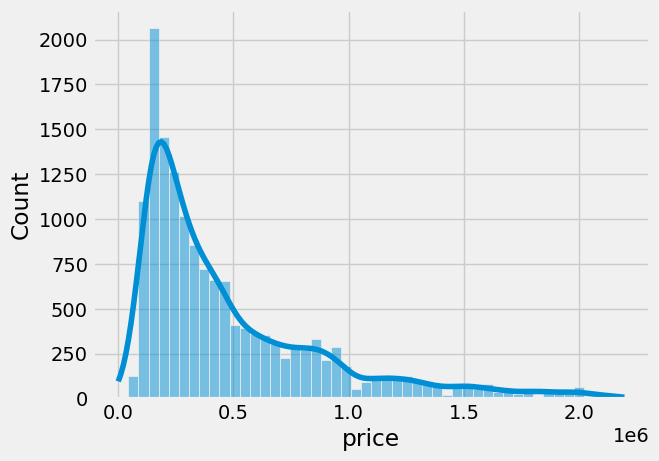

In [5]:

q = df_e['price'].quantile(0.95)

df_e = df_e[df_e['price']<q]

sns.histplot(df_e['price'],kde = True,bins=50)

#### 2. Rooms

<Axes: xlabel='rooms', ylabel='Count'>

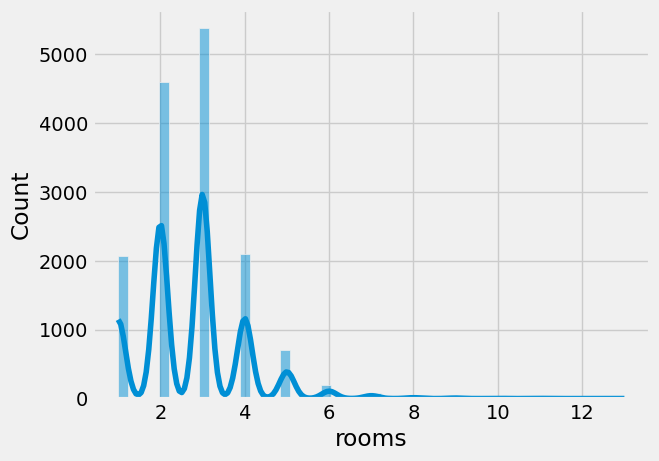

In [6]:
sns.histplot(df_e['rooms'],kde = True,bins=50)

<Axes: xlabel='rooms', ylabel='Count'>

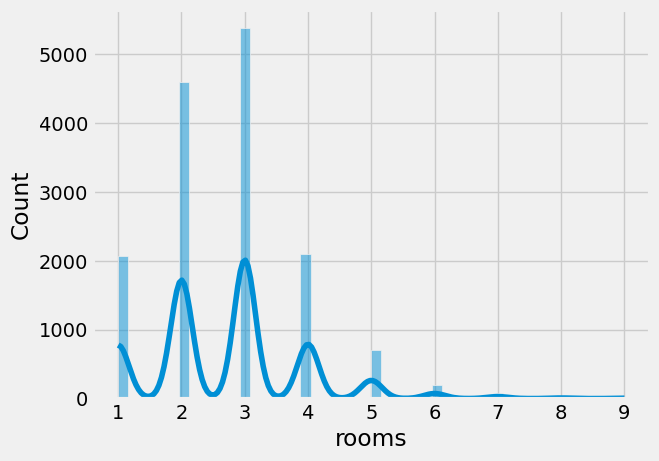

In [7]:

df_e = df_e[df_e['rooms']<10]

sns.histplot(df_e['rooms'],kde = True,bins=50)

#### 3. Area (m2)

<Axes: xlabel='m2', ylabel='Count'>

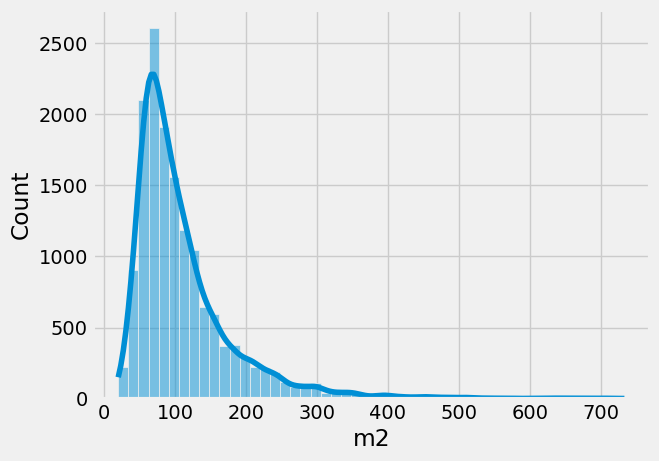

In [8]:
sns.histplot(df_e['m2'], kde = True, bins = 50)

<Axes: xlabel='m2', ylabel='Count'>

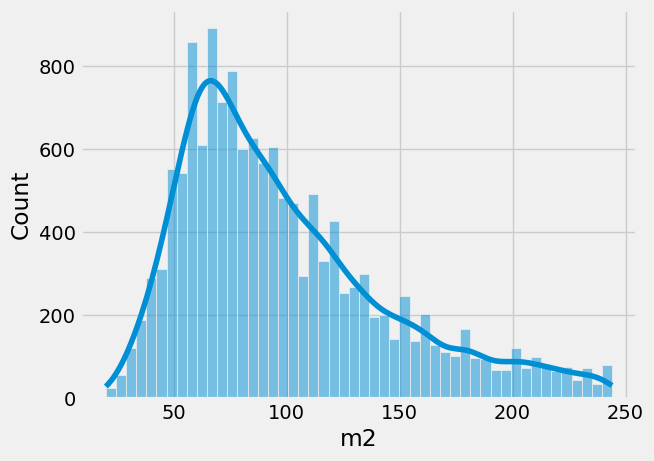

In [9]:
q = df_e['m2'].quantile(0.95)

df_e = df_e[df_e['m2']<q]

sns.histplot(df_e['m2'],kde = True,bins=50)

#### Data Cleaning

In [10]:
df_e_without_duplicates = df_e.drop_duplicates()

In [11]:
df_e_without_duplicates.isna().sum()

price             0
house_type        0
house_type_2    449
rooms             0
m2                0
elevator          0
garage            0
neighborhood      0
district          0
dtype: int64

In [12]:
df_e_without_duplicates_without_na = df_e_without_duplicates.dropna()

In [13]:
df_e_without_duplicates_without_na.isna().sum()

price           0
house_type      0
house_type_2    0
rooms           0
m2              0
elevator        0
garage          0
neighborhood    0
district        0
dtype: int64

In [14]:
df_e_without_duplicates_without_na.shape

(12391, 9)

In [15]:
df = df_e_without_duplicates_without_na

In [16]:
# Create the new columns
df['house_type_'] = df['house_type']
df['floor'] = 'n/a'

In [17]:
import re
# Function to categorize house_type_ and floor
def categorize_house_type(house_type):
    match = re.match(r'^planta\s*(-?\d+)$', house_type)
    if match:
        return 'Apartment', match.group(1)
    else:
        return house_type, 'n/a'

# Apply the function to the DataFrame and create new columns
df[['house_type_', 'floor']] = df['house_type'].apply(lambda x: pd.Series(categorize_house_type(x)))

print(df)

        price house_type house_type_2  rooms     m2  elevator  garage  \
0      495000   planta 1     exterior      3  118.0      True    True   
1      485000   planta 2     exterior      2   82.0      True    True   
2      315000   planta 2     exterior      2   72.0     False   False   
3      585000   planta 4     exterior      2  174.0      True    True   
4      255000       bajo     exterior      3   75.0     False   False   
...       ...        ...          ...    ...    ...       ...     ...   
15969  380000   planta 5     exterior      3   90.0      True    True   
15971  108000   planta 3     exterior      3   60.0     False   False   
15972  140000       bajo     exterior      2   65.0     False   False   
15973  135000   planta 1     exterior      2   71.0     False   False   
15974  150000   planta 4     exterior      4   71.0      True   False   

          neighborhood    district house_type_ floor  
0              Chopera  Arganzuela   Apartment     1  
1      Palos 

In [18]:
df['house_type_'].value_counts()

house_type_
Apartment      10223
bajo            1724
entreplanta      210
chalet            77
semi-sotano       72
casa              55
sotano            30
Name: count, dtype: int64

In [19]:
df.drop(columns=['house_type'], inplace=True)

In [20]:
df['floor'].replace('n/a','0',inplace=True)

In [21]:
df['floor'].value_counts()

floor
1     2592
2     2205
0     2168
3     1901
4     1378
5      833
6      497
7      310
8      173
9      118
10      69
11      42
13      33
12      27
-1      13
14      10
15       7
18       5
16       4
20       4
19       2
Name: count, dtype: int64

In [22]:
# Convert 'floor' column to numeric, setting errors='coerce' to handle invalid values
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')

print(df['floor'].dtype)  # This should now print 'int64'


int64


In [23]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df[numeric_cols].corr()['price'].sort_values(ascending=False)

price    1.000000
m2       0.792947
rooms    0.404496
floor    0.222657
Name: price, dtype: float64

In [46]:
df.to_csv('../data/processed/Additional_Dataset_wo_null_ayushya.csv')

In [24]:
#conda install -c conda-forge pycaret

In [25]:
from pycaret.regression import *

In [26]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=df,
    #test_data=test_data,
    target = 'price',
    session_id=9,
    ignore_features=[],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    remove_multicollinearity=True,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore'
    )

,Description,Value
0,Session id,9
1,Target,price
2,Target type,Regression
3,Original data shape,"(12391, 10)"
4,Transformed data shape,"(12391, 36)"
5,Transformed train set shape,"(8673, 36)"
6,Transformed test set shape,"(3718, 36)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


#### Compare models

In [27]:
# compare baseline models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,71664.6824,14401022641.3672,119902.7984,0.8811,0.2227,0.2002,0.2850
et,Extra Trees Regressor,70397.8047,15053002668.5883,122571.5297,0.8758,0.2248,0.1933,0.2740
rf,Random Forest Regressor,71760.1276,15114668478.6669,122807.4766,0.8750,0.2264,0.2004,0.3020
gbr,Gradient Boosting Regressor,79040.0956,16626025730.2415,128813.3915,0.8628,0.2440,0.2224,0.1420
knn,K Neighbors Regressor,87053.2942,21122676835.6819,145158.0525,0.8260,0.2636,0.2294,0.0580
dt,Decision Tree Regressor,93433.7532,26863211189.9231,163720.1719,0.7781,0.3040,0.2357,0.0520
ridge,Ridge Regression,116940.5082,28958269391.9462,170033.5782,0.7612,0.6292,0.3909,0.0500
llar,Lasso Least Angle Regression,116947.6384,28958377759.4827,170033.9693,0.7612,0.6309,0.3910,0.0500
br,Bayesian Ridge,116836.3180,28957519041.4757,170030.3103,0.7612,0.6192,0.3901,0.0510
lasso,Lasso Regression,116947.6526,28958372090.2995,170033.9528,0.7612,0.6310,0.3910,0.1200


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [28]:
# list all models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [29]:
# Compare tree models
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,71664.6824,14401022641.3672,119902.7984,0.8811,0.2227,0.2002,0.3110
et,Extra Trees Regressor,70397.8047,15053002668.5883,122571.5297,0.8758,0.2248,0.1933,0.2760
rf,Random Forest Regressor,71760.1276,15114668478.6669,122807.4766,0.8750,0.2264,0.2004,0.3010
gbr,Gradient Boosting Regressor,79040.0956,16626025730.2415,128813.3915,0.8628,0.2440,0.2224,0.1430
dt,Decision Tree Regressor,93433.7532,26863211189.9231,163720.1719,0.7781,0.3040,0.2357,0.0500


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [30]:
compare_tree_models

LGBMRegressor(n_jobs=-1, random_state=9)

In [31]:
# Best 3 models
best_6_models = compare_models(cross_validation = True, n_select=6)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,71664.6824,14401022641.3672,119902.7984,0.8811,0.2227,0.2002,0.2930
et,Extra Trees Regressor,70397.8047,15053002668.5883,122571.5297,0.8758,0.2248,0.1933,0.2780
rf,Random Forest Regressor,71760.1276,15114668478.6669,122807.4766,0.8750,0.2264,0.2004,0.3010
gbr,Gradient Boosting Regressor,79040.0956,16626025730.2415,128813.3915,0.8628,0.2440,0.2224,0.1460
knn,K Neighbors Regressor,87053.2942,21122676835.6819,145158.0525,0.8260,0.2636,0.2294,0.0530
dt,Decision Tree Regressor,93433.7532,26863211189.9231,163720.1719,0.7781,0.3040,0.2357,0.0500
ridge,Ridge Regression,116940.5082,28958269391.9462,170033.5782,0.7612,0.6292,0.3909,0.0460
llar,Lasso Least Angle Regression,116947.6384,28958377759.4827,170033.9693,0.7612,0.6309,0.3910,0.0480
br,Bayesian Ridge,116836.3180,28957519041.4757,170030.3103,0.7612,0.6192,0.3901,0.0470
lasso,Lasso Regression,116947.6526,28958372090.2995,170033.9528,0.7612,0.6310,0.3910,0.1170


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

In [32]:
best_6_models

[LGBMRegressor(n_jobs=-1, random_state=9),
 ExtraTreesRegressor(n_jobs=-1, random_state=9),
 RandomForestRegressor(n_jobs=-1, random_state=9),
 GradientBoostingRegressor(random_state=9),
 KNeighborsRegressor(n_jobs=-1),
 DecisionTreeRegressor(random_state=9)]

##### Tune LGBM Regressor

In [33]:
# Create a LightGBM regressor model
lgbm = create_model('lightgbm')

# Define custom grid for tuning
custom_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [20, 50, 100]
}

# Tune the LightGBM regressor model with the custom grid
tuned_lgbm = tune_model(lgbm, custom_grid=custom_grid, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,70546.3665,13619912364.2659,116704.3802,0.8752,0.2207,0.1749
1,70825.5388,14525981827.7437,120523.7812,0.8881,0.2875,0.4721
2,72609.6049,14359906813.8053,119832.8286,0.8673,0.2209,0.1767
3,74091.9848,16205144123.9114,127299.4270,0.8687,0.2167,0.1687
4,70444.2646,13926938843.4021,118012.4521,0.8850,0.2023,0.1601
5,76235.2974,16641109758.2464,129000.4254,0.8770,0.2175,0.1704
6,69992.2463,13569077324.9140,116486.3826,0.8897,0.2061,0.1648
7,74412.1146,15129393379.0919,123001.5991,0.8771,0.2228,0.1740
8,67288.5884,13283383793.9550,115253.5630,0.8917,0.2212,0.1702


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,70255.6830,13441870115.0587,115939.0793,0.8768,0.2176,0.1710
1,70478.5934,14991173437.9489,122438.4475,0.8845,0.2863,0.4748
2,73251.8186,15082514407.7821,122810.8888,0.8606,0.2230,0.1760
3,71448.4437,14553973104.4210,120639.8487,0.8821,0.2080,0.1638
4,72386.6642,14696814208.4768,121230.4178,0.8786,0.2035,0.1610
5,77320.0027,16784024431.6972,129553.1722,0.8760,0.2190,0.1721
6,68957.1377,13441647182.5577,115938.1179,0.8908,0.2040,0.1610
7,74606.2282,14889303790.7789,122021.7349,0.8790,0.2241,0.1745
8,67542.7308,13364402729.8891,115604.5100,0.8910,0.2195,0.1693


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### Ensemble model

In [34]:
# ensemble with bagging
ensemble_model(lgbm, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,70511.1574,13491223797.7444,116151.7275,0.8764,0.2175,0.1728
1,70478.8389,14550301952.4471,120624.6324,0.8879,0.2861,0.4700
2,72856.2727,14598990471.2072,120826.2822,0.8651,0.2213,0.1769
3,72941.2074,15408615033.0919,124131.4426,0.8751,0.2125,0.1675
4,71326.0481,14302570698.7036,119593.3556,0.8819,0.2017,0.1611
5,76291.9786,16841579331.5402,129775.1106,0.8755,0.2166,0.1700
6,69418.4107,13319390629.8480,115409.6644,0.8918,0.2058,0.1651
7,73170.5831,14221530919.9699,119254.0604,0.8845,0.2207,0.1732
8,68211.4544,13358914666.2280,115580.7712,0.8911,0.2216,0.1724


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=LGBMRegressor(n_jobs=-1, random_state=9),
                 random_state=9)

In [35]:
# ensemble with boosting
ensemble_model(lgbm, method = 'Boosting',)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,72741.6875,13584780904.4281,116553.7683,0.8755,0.2257,0.1842
1,72909.5776,14457236741.4627,120238.2499,0.8886,0.2928,0.5019
2,75434.1448,14756686179.5944,121477.1015,0.8636,0.2271,0.1876
3,76812.6053,15893622542.3059,126069.9113,0.8712,0.2270,0.1847
4,73028.2771,14043589282.6239,118505.6508,0.8840,0.2109,0.1736
5,81247.3031,18360133315.1802,135499.5694,0.8643,0.2277,0.1867
6,71412.3028,12706182397.3582,112721.7033,0.8968,0.2117,0.1758
7,75336.1185,14381622847.4687,119923.4041,0.8832,0.2271,0.1848
8,70370.8527,14164938979.4214,119016.5492,0.8845,0.2274,0.1813


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=LGBMRegressor(n_jobs=-1, random_state=9),
                  n_estimators=10, random_state=9)

#### Blend models 

In [36]:
# top 3 models based on mae
best_6_models

[LGBMRegressor(n_jobs=-1, random_state=9),
 ExtraTreesRegressor(n_jobs=-1, random_state=9),
 RandomForestRegressor(n_jobs=-1, random_state=9),
 GradientBoostingRegressor(random_state=9),
 KNeighborsRegressor(n_jobs=-1),
 DecisionTreeRegressor(random_state=9)]

In [37]:
# blend top 3 models
blend_models(best_6_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,69037.4534,13195464398.5208,114871.5126,0.8791,0.2178,0.1697
1,70428.9984,15060678936.7912,122721.9578,0.8840,0.2813,0.4290
2,71055.6369,13804350991.6621,117491.9188,0.8724,0.2205,0.1756
3,73256.7677,16228406983.1670,127390.7649,0.8685,0.2159,0.1682
4,68561.7060,13446191580.3828,115957.7146,0.8890,0.1956,0.1552
5,74480.2792,16237472668.5589,127426.3421,0.8800,0.2149,0.1685
6,67351.5270,12984657127.3900,113950.2397,0.8945,0.2017,0.1579
7,71754.5880,14364951569.0205,119853.8759,0.8833,0.2179,0.1702
8,65912.5231,13228200177.0164,115013.9130,0.8921,0.2179,0.1675


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=9)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=9)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1, random_state=9)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=9)),
                            ('K Neighbors Regressor',
                             KNeighborsRegressor(n_jobs=-1)),
                            ('Decision Tree Regressor',
                             DecisionTreeRegressor(random_state=9))],
                n_jobs=-1)

#### stack models

In [38]:
stack_models(best_6_models)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,67077.7318,12750385189.7064,112917.6035,0.8832,0.2126,0.1643
1,67894.1807,14055965857.5260,118557.8587,0.8917,0.2793,0.4418
2,70040.1811,13559256372.8474,116444.2200,0.8747,0.2140,0.1690
3,71412.7134,15355295392.7328,123916.4856,0.8756,0.2083,0.1621
4,67478.1564,13067082716.1676,114311.3412,0.8921,0.1915,0.1506
5,73797.7897,15949288192.5183,126290.4913,0.8821,0.2117,0.1645
6,67415.3156,12880798823.4176,113493.6070,0.8953,0.1988,0.1557
7,71729.3374,14327913375.7036,119699.2622,0.8836,0.2142,0.1667
8,63845.0371,12270523004.9365,110772.3928,0.8999,0.2110,0.1598


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=9)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1, random_state=9)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=9)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=9)),
                              ('K Neighbors Regressor',
                               KNeighborsRegressor(n_jobs=-1)),
                              ('Decision Tree Regressor',
                               DecisionTreeRegressor(random_state=9))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [39]:
# predict on test set
holdout_pred = predict_model(best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,69730.9416,13727192485.5641,117163.1021,0.8745,0.2147,0.1700


In [40]:
# show predictions df
holdout_pred[['price','prediction_label']].head()

,price,prediction_label
4022,575000,5.441791e+05
5080,435000,5.495393e+05
5890,1595000,1.512469e+06
1599,430000,3.581119e+05
7910,726000,7.904451e+05


#### Export as csv file

In [41]:
df.to_csv('../data/processed/Additional_Dataset_wo_null_ayushya.csv')

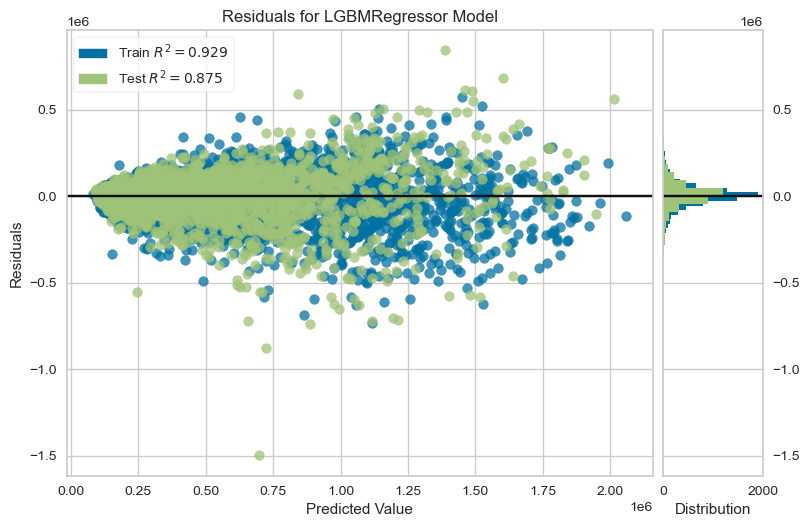

In [42]:
#### # plot residuals
plot_model(best_model, plot = 'residuals')

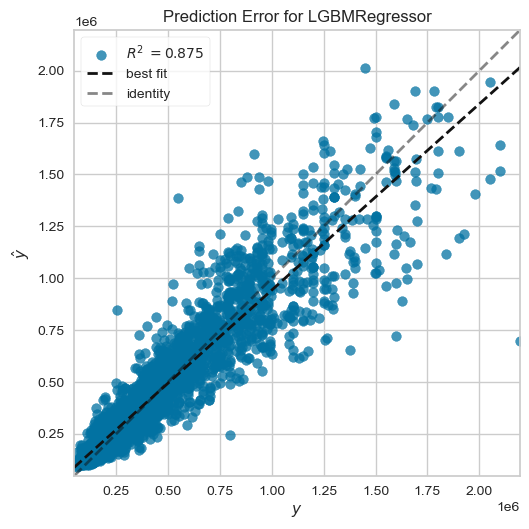

In [43]:
# plot error
plot_model(best_model, plot = 'error')

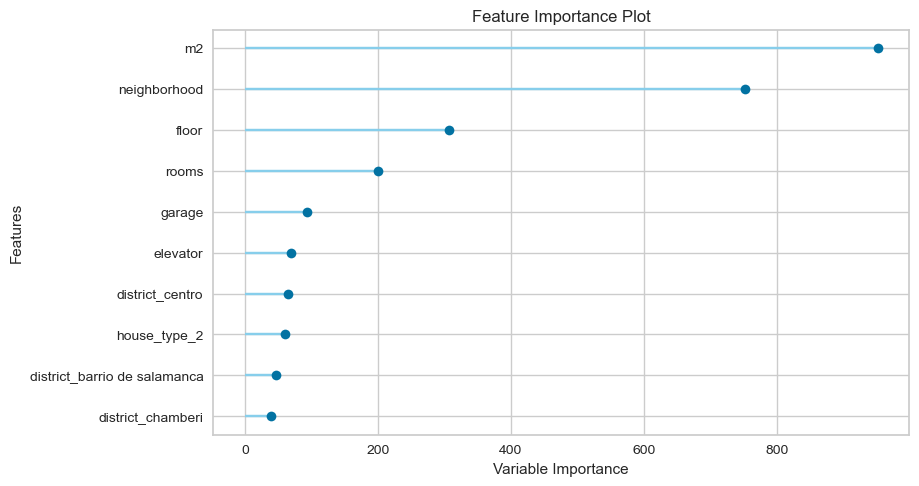

In [44]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [45]:
#### 